<a href="https://colab.research.google.com/github/salmakhale/DL-computer-vision/blob/main/Telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Conection
# load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning&Analysis

In [ ]:
#Check data structure
print("Data Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Summary statistics
print("\nSummary Statistics (Numerical Features):")
print(df.describe())


Summary Statistics (Numerical Features):
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
print("\nSummary Statistics (Categorical Features):")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Summary Statistics (Categorical Features):

Value Counts for customerID:
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value Counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value Counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value Counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value Counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value Counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value Counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Value Counts for OnlineSecurity:
OnlineSecurity
No   

In [ ]:
# Do customers with PhoneService have a lower churn rate?
import plotly.express as px
import plotly.graph_objects as go

sandc = df.groupby("PhoneService")["Churn"].value_counts().reset_index(name='count')
fig = px.bar(sandc, x='PhoneService', y='count', color='Churn',
             barmode='stack',
             labels={'PhoneService': 'Has Phone Service', 'Churn': 'Churn Status'},
             title='Relationship between Phone Service and Churn')
fig.show()

In [ ]:
# Do customers prefer StreamingTV or StreamingMovies, and does this affect churn?
sandc_tv = df.groupby("StreamingTV")["Churn"].value_counts().reset_index(name='count')

fig_tv = px.bar(sandc_tv, x='StreamingTV', y='count', color='Churn',
                barmode='stack',
                labels={'StreamingTV': 'Has Streaming TV', 'Churn': 'Churn Status'},
                title='Relationship between Streaming TV and Churn')

fig_tv.show()

In [ ]:
sandc_movies = df.groupby("StreamingMovies")["Churn"].value_counts().reset_index(name='count')
fig_movies = px.bar(sandc_movies, x='StreamingMovies', y='count', color='Churn',
                    barmode='stack',
                    labels={'StreamingMovies': 'Has Streaming Movies', 'Churn': 'Churn Status'},
                    title='Relationship between Streaming Movies and Churn')

fig_movies.show()


In [ ]:
def calculate_total_services(row):
    count = 0
    if row['PhoneService'] == 'Yes':
        count += 1
    if row['MultipleLines'] == 'Yes':
        count += 1
    if row['OnlineSecurity'] == 'Yes':
        count += 1
    if row['OnlineBackup'] == 'Yes':
        count += 1
    if row['DeviceProtection'] == 'Yes':
        count += 1
    if row['TechSupport'] == 'Yes':
        count += 1
    if row['StreamingTV'] == 'Yes':
        count += 1
    if row['StreamingMovies'] == 'Yes':
        count += 1
    return count
df['TotalServices'] = df.apply(calculate_total_services, axis=1)
df['TotalServices']

,TotalServices
0,1
1,3
2,3
3,3
4,1
...,...
7038,7
7039,6
7040,1
7041,2


In [ ]:
df.groupby("Contract")["TotalServices"].mean()

,TotalServices
Contract,
Month-to-month,2.837161
One year,3.822132
Two year,4.165782


## Data Visualization

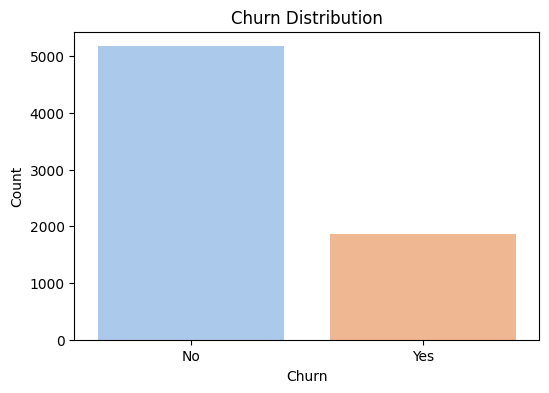

In [ ]:
#Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Churn", palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

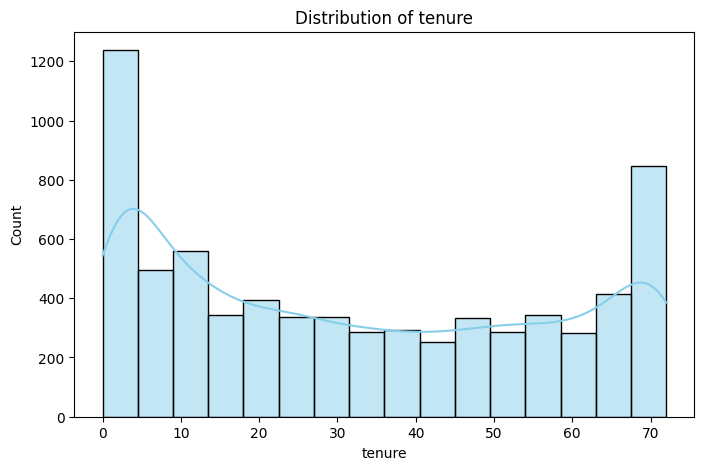

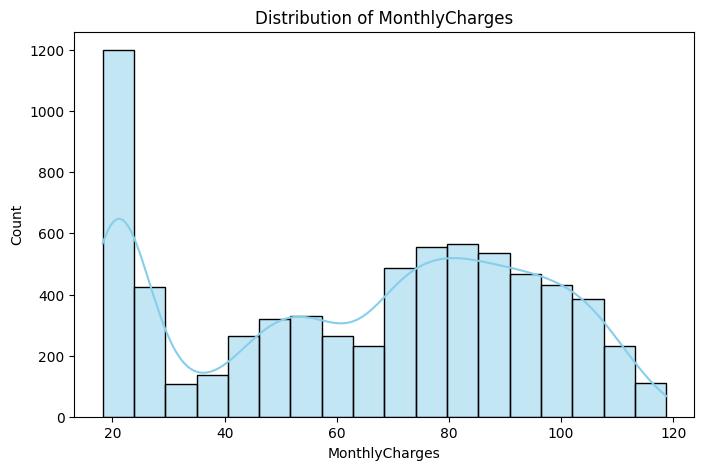

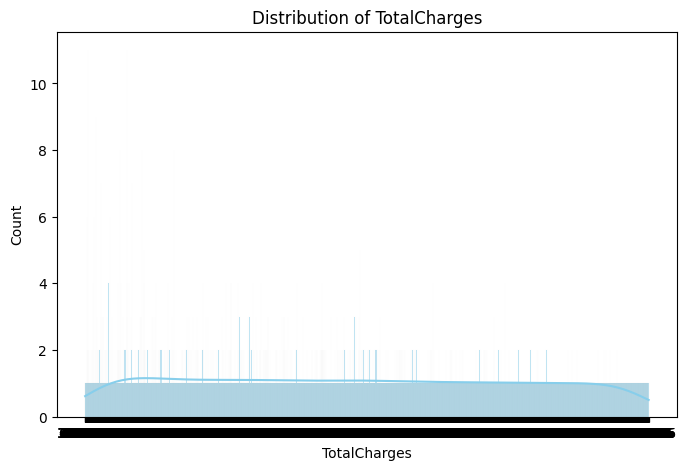

In [ ]:
# Numerical feature distributions
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

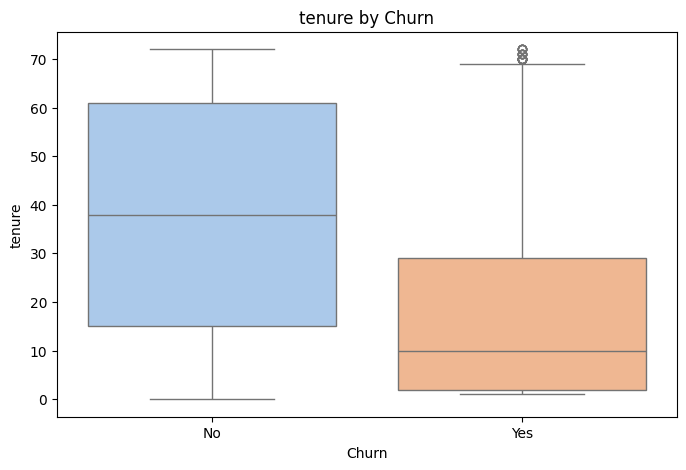

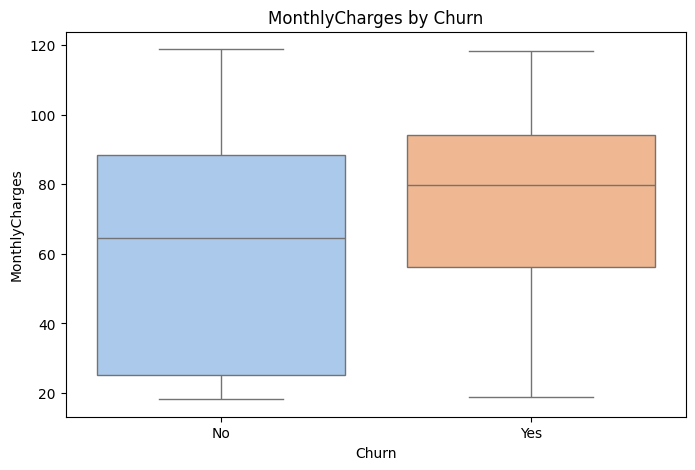

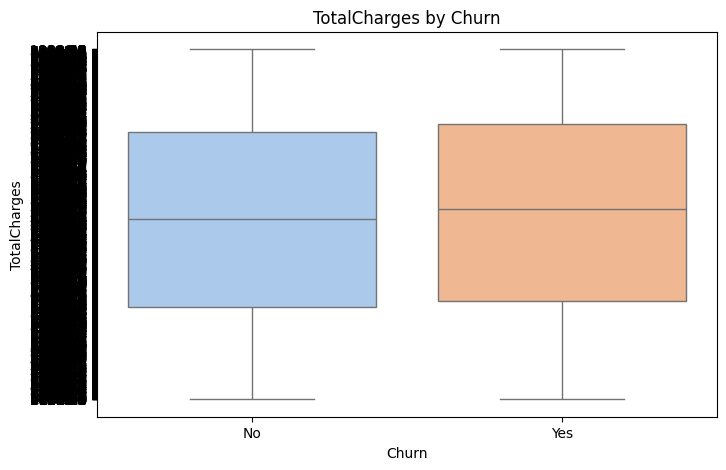

In [ ]:
# Box plots of numerical features by Churn
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="Churn", y=col, palette="pastel")
    plt.title(f"{col} by Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

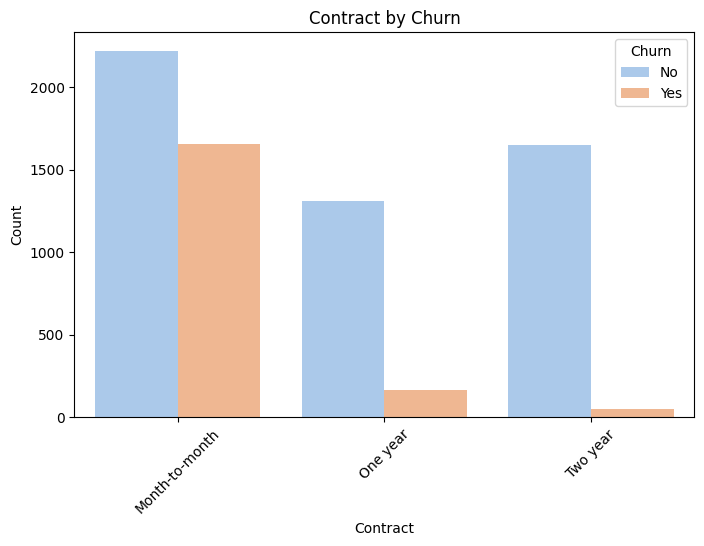

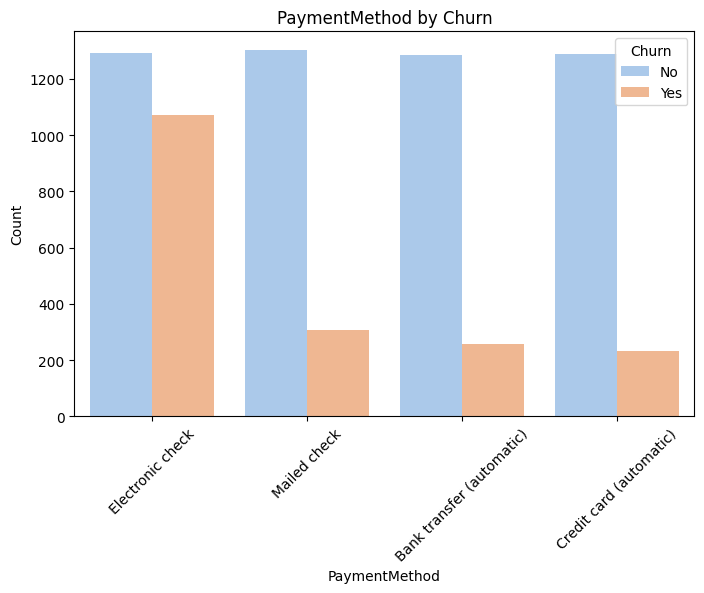

In [ ]:
# Categorical features by Churn
categorical_columns = ["Contract", "PaymentMethod"]
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue="Churn", palette="pastel")
    plt.title(f"{col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.show()

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TotalServices        0
dtype: int64


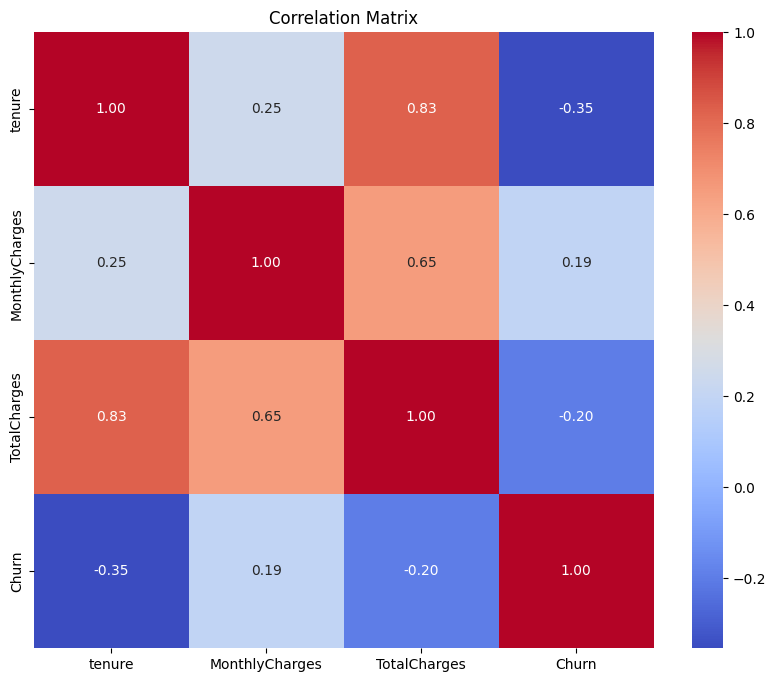

Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges     Churn
tenure          1.000000        0.246862      0.825880 -0.354049
MonthlyCharges  0.246862        1.000000      0.651065  0.192858
TotalCharges    0.825880        0.651065      1.000000 -0.199484
Churn          -0.354049        0.192858     -0.199484  1.000000


In [ ]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check for missing values after conversion
print("Missing values after conversion:")
print(df.isnull().sum())

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Encode Churn for numerical analysis
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Correlation matrix
correlation_matrix = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TotalServices       0
dtype: int64


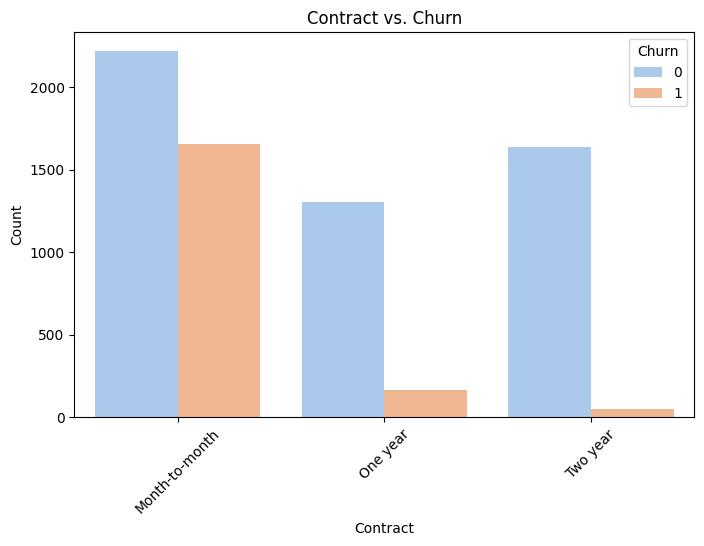

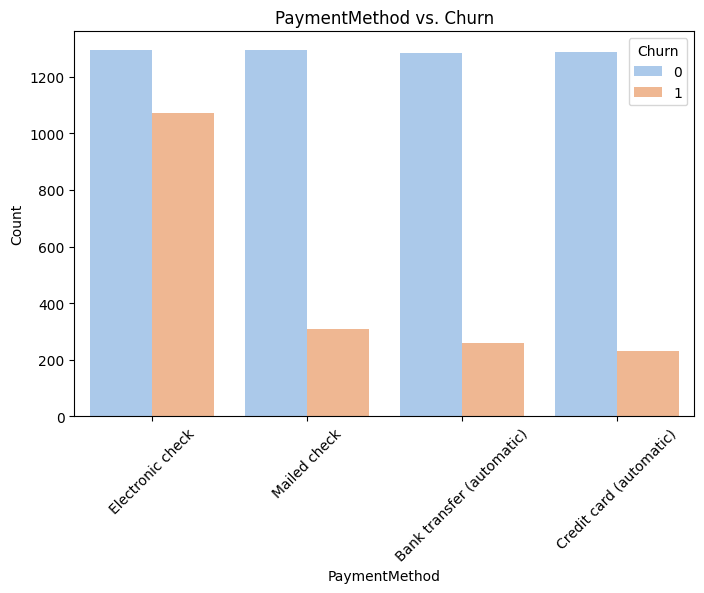

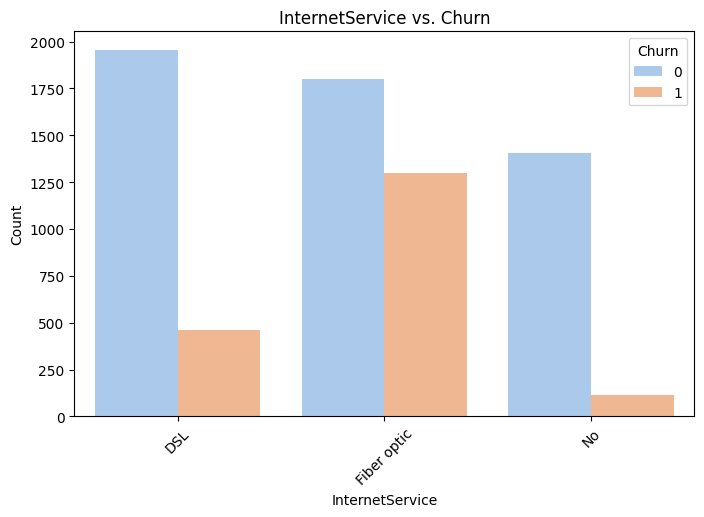

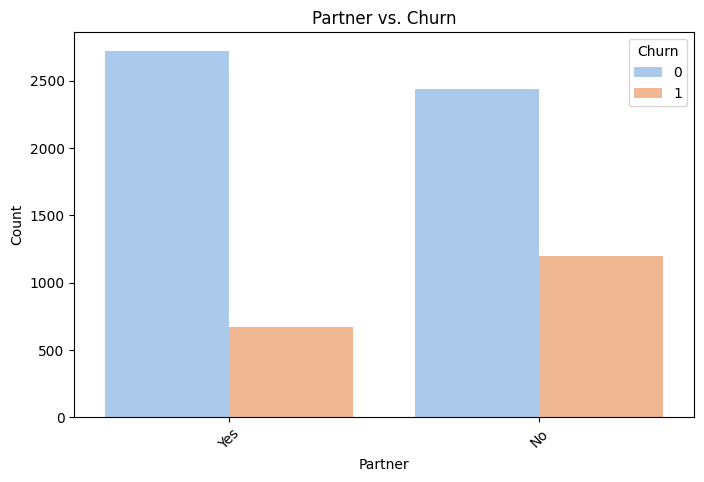

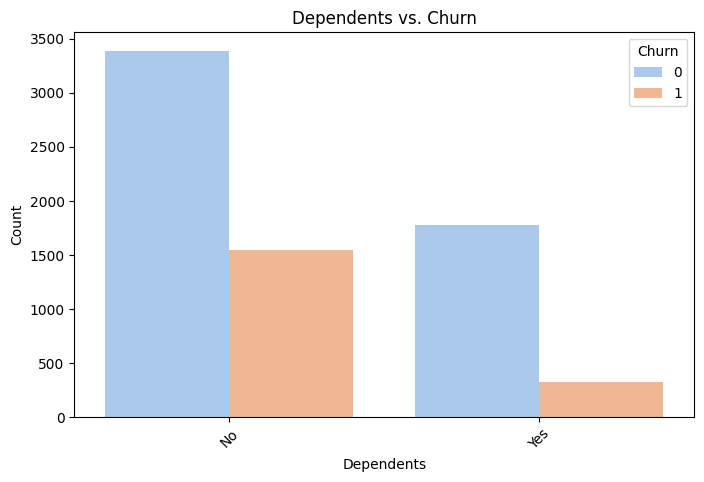

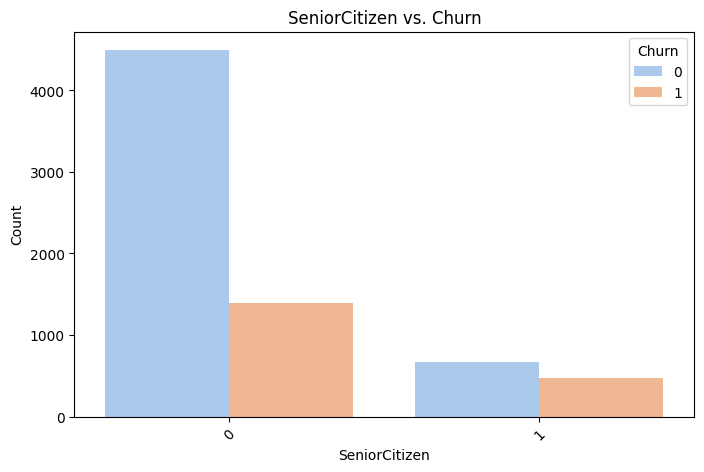


Churn Rates for Contract:
Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64

Churn Rates for PaymentMethod:
PaymentMethod
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Electronic check             0.452854
Mailed check                 0.192020
Name: Churn, dtype: float64

Churn Rates for InternetService:
InternetService
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: Churn, dtype: float64

Churn Rates for Partner:
Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64

Churn Rates for Dependents:
Dependents
No     0.312791
Yes    0.155312
Name: Churn, dtype: float64

Churn Rates for SeniorCitizen:
SeniorCitizen
0    0.236503
1    0.416813
Name: Churn, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to analyze
categorical_columns = ["Contract", "PaymentMethod", "InternetService", "Partner", "Dependents", "SeniorCitizen",]

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue="Churn", palette="pastel")
    plt.title(f"{col} vs. Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn")
    plt.xticks(rotation=45)
    plt.show()

# Calculate churn rates for each category
churn_rates = {}
for col in categorical_columns:
    churn_rate = df.groupby(col)["Churn"].mean()
    churn_rates[col] = churn_rate

# Display churn rates for each category
for col, rates in churn_rates.items():
    print(f"\nChurn Rates for {col}:")
    print(rates)


##Outlier Detection and Handling

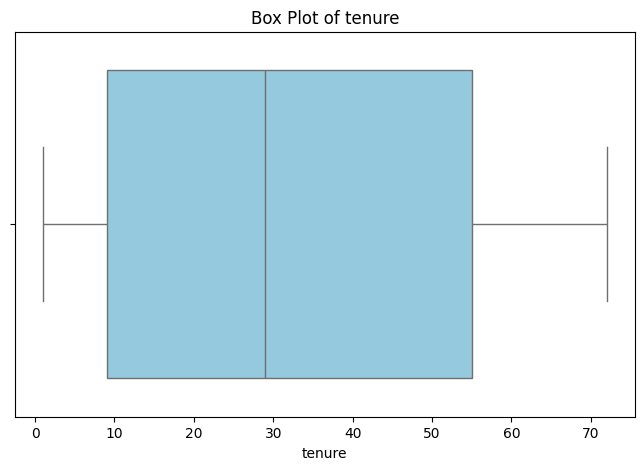

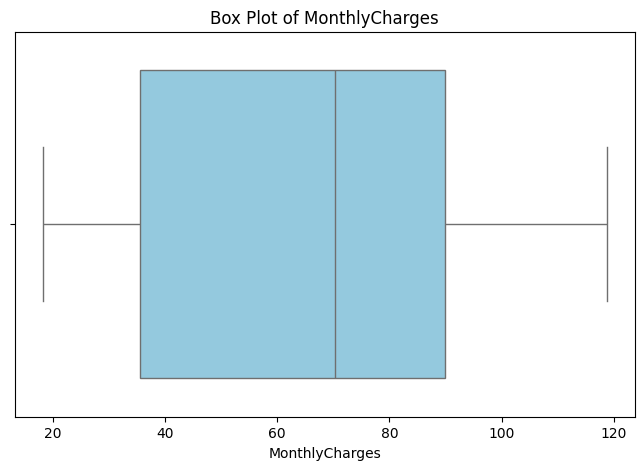

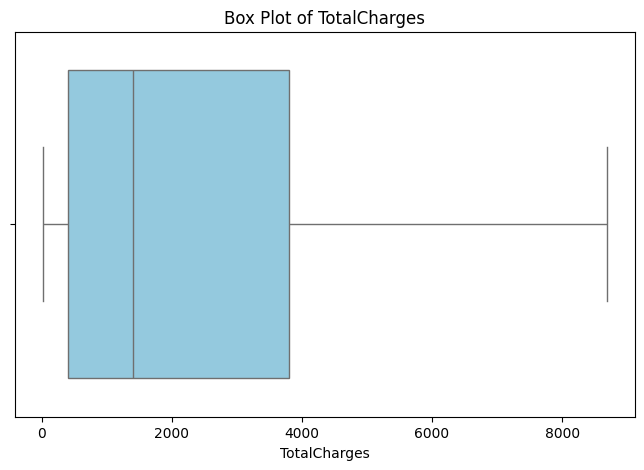


Outliers in tenure:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, TotalServices]
Index: []

[0 rows x 22 columns]

Outliers in MonthlyCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, TotalServices]
Index: []

[0 rows x 22 columns]

Outliers in TotalCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Str

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Focus on numerical columns
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

# Box Plot for Outlier Visualization
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

# Detect Outliers using IQR
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in {col}:")
    print(outliers[col])

# Cap Outliers
df_capped = df.copy()
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,
                              np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))

# Display capped values
print("\nData After Capping Outliers:")
print(df_capped.head())


In [ ]:
print("\nSummary Statistics After Capping Outliers:")
print(df_capped.describe())


Summary Statistics After Capping Outliers:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn  \
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000   
mean        0.162400    32.421786       64.798208   2283.300441     0.265785   
std         0.368844    24.545260       30.085974   2266.771362     0.441782   
min         0.000000     1.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.587500    401.450000     0.000000   
50%         0.000000    29.000000       70.350000   1397.475000     0.000000   
75%         0.000000    55.000000       89.862500   3794.737500     1.000000   
max         1.000000    72.000000      118.750000   8684.800000     1.000000   

       TotalServices  
count    7032.000000  
mean        3.363339  
std         2.062067  
min         0.000000  
25%         1.000000  
50%         3.000000  
75%         5.000000  
max         8.000000  


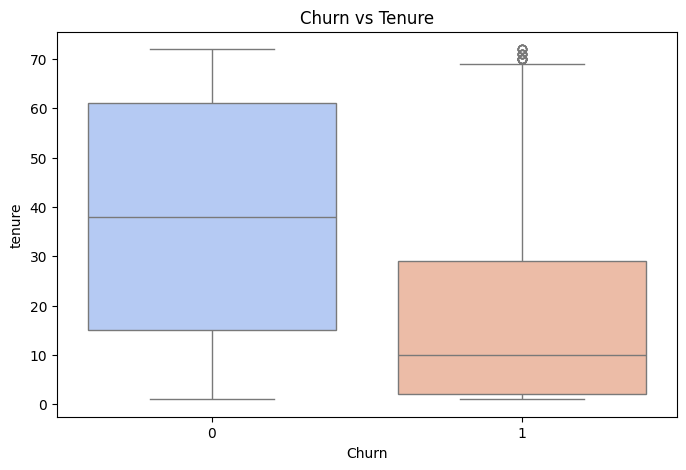

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_capped, x="Churn", y="tenure", palette="coolwarm")
plt.title("Churn vs Tenure")
plt.show()


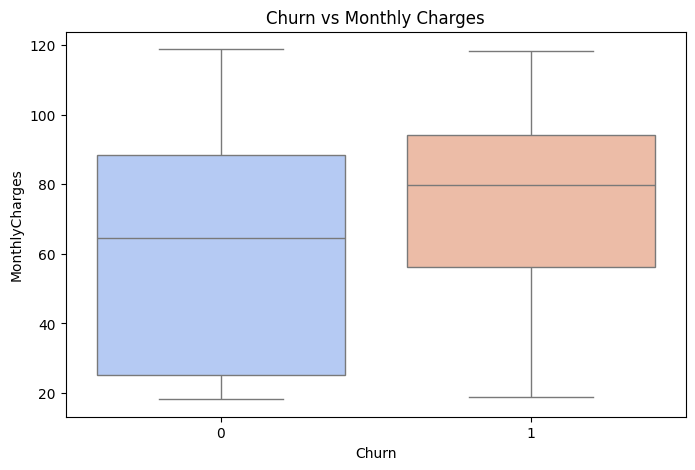

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_capped, x="Churn", y="MonthlyCharges", palette="coolwarm")
plt.title("Churn vs Monthly Charges")
plt.show()


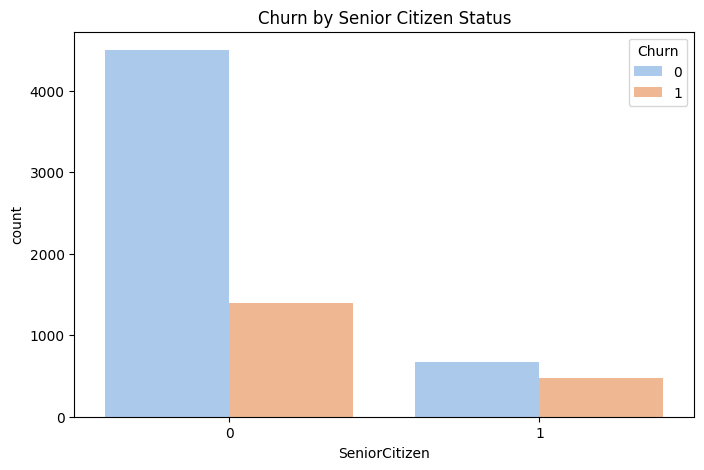

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_capped, x="SeniorCitizen", hue="Churn", palette="pastel")
plt.title("Churn by Senior Citizen Status")
plt.show()


#Chi-Square Test:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define the categorical variables to analyze
categorical_columns = ['Contract', 'PaymentMethod']

# Iterate over each categorical column to test for association with Churn
for col in categorical_columns:
    # Create the contingency table
    contingency_table = pd.crosstab(df_capped[col], df_capped['Churn'])

    # Perform the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the result
    print(f"Chi-Square Test for {col} and Churn:")
    print(f"Chi2 Stat: {chi2:.4f}, p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies Table:\n{expected}")
    print("\n" + "="*50)

    # Interpretation of p-value
    if p < 0.05:
        print(f"There is a significant relationship between {col} and Churn.\n")
    else:
        print(f"There is no significant relationship between {col} and Churn.\n")


Chi-Square Test for Contract and Churn:
Chi2 Stat: 1179.5458, p-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies Table:
[[2845.08319113 1029.91680887]
 [1080.76450512  391.23549488]
 [1237.15230375  447.84769625]]

There is a significant relationship between Contract and Churn.

Chi-Square Test for PaymentMethod and Churn:
Chi2 Stat: 645.4299, p-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies Table:
[[1132.15955631  409.84044369]
 [1116.74104096  404.25895904]
 [1736.41851536  628.58148464]
 [1177.68088737  426.31911263]]

There is a significant relationship between PaymentMethod and Churn.



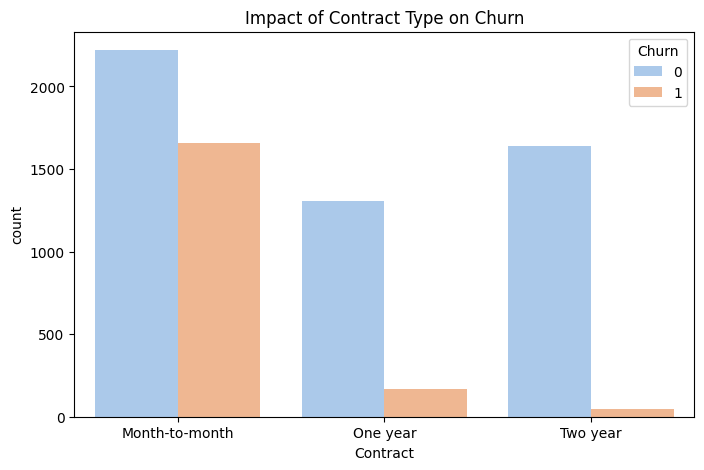

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_capped, x='Contract', hue='Churn', palette='pastel')
plt.title('Impact of Contract Type on Churn')
plt.show()


In [ ]:
corr_matrix = df_capped[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
print(corr_matrix)


                  tenure  MonthlyCharges  TotalCharges     Churn
tenure          1.000000        0.246862      0.825880 -0.354049
MonthlyCharges  0.246862        1.000000      0.651065  0.192858
TotalCharges    0.825880        0.651065      1.000000 -0.199484
Churn          -0.354049        0.192858     -0.199484  1.000000


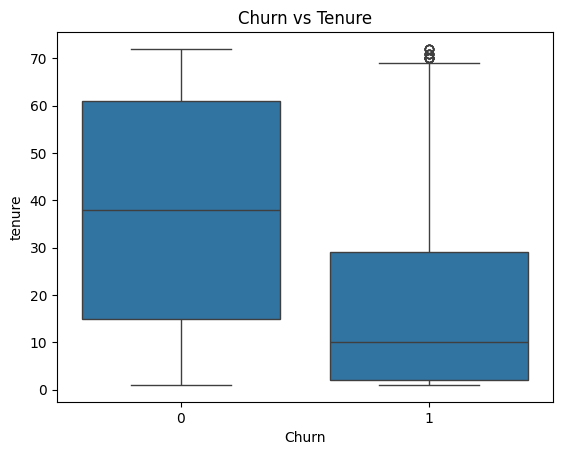

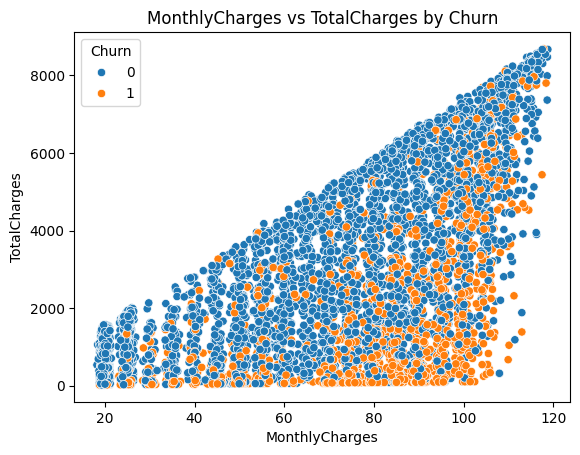

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df_capped)
plt.title('Churn vs Tenure')
plt.show()

sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df_capped)
plt.title('MonthlyCharges vs TotalCharges by Churn')
plt.show()


#Check Data Balance

Churn Distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


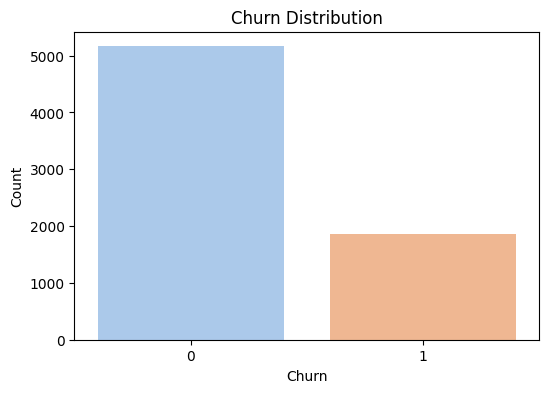

In [ ]:
# Check the distribution of the Churn column
churn_counts = df_capped['Churn'].value_counts()
print(f"Churn Distribution:\n{churn_counts}")

# Visualize the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_capped, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Prepare the features (X) and target (y)
X = df_capped.drop(['Churn', 'customerID'], axis=1)  # Drop 'Churn' and 'customerID'
y = df_capped['Churn']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of the target variable
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")


ValueError: could not convert string to float: 'Female'

In [ ]:
print(X.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
TotalServices         int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding (if categorical variables are binary)
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Alternatively, use One-Hot Encoding for better performance with non-binary categories
X = pd.get_dummies(X, drop_first=True)

print(X.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
TotalServices         int64
dtype: object


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({0: 5163, 1: 1869})
Resampled class distribution: Counter({0: 5163, 1: 5163})


## Class Weight Adjustment in Models


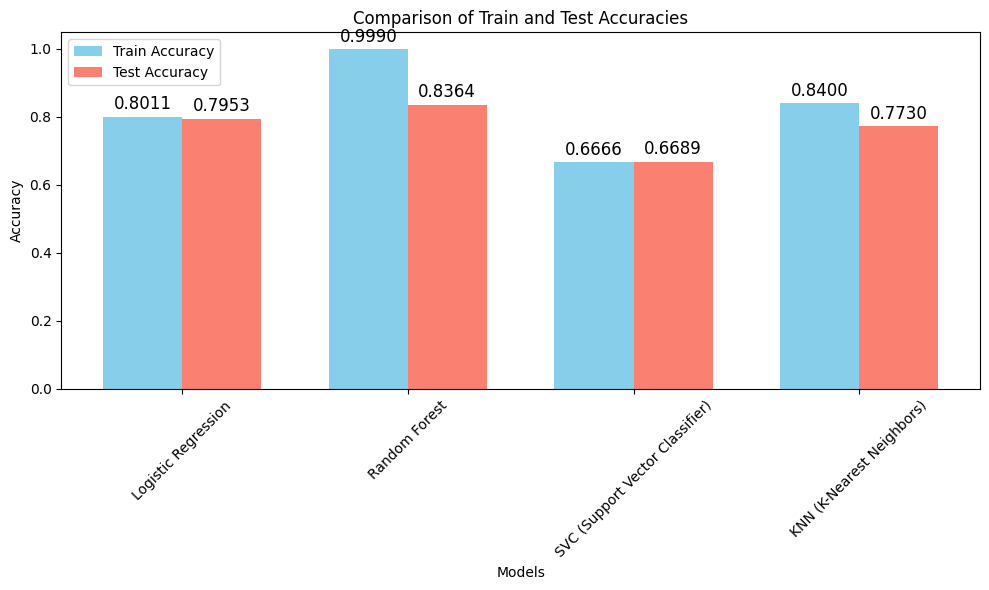

Logistic Regression - Train Accuracy: 0.8011, Test Accuracy: 0.7953
Random Forest - Train Accuracy: 0.9990, Test Accuracy: 0.8364
SVC (Support Vector Classifier) - Train Accuracy: 0.6666, Test Accuracy: 0.6689
KNN (K-Nearest Neighbors) - Train Accuracy: 0.8400, Test Accuracy: 0.7730


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Prepare the features (X) and target (y)
X = df_capped.drop(['Churn', 'customerID'], axis=1)  # Drop 'Churn' and 'customerID'
y = df_capped['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC (Support Vector Classifier)': SVC(random_state=42),
    'KNN (K-Nearest Neighbors)': KNeighborsClassifier()
}

# Lists to store accuracy scores for train and test sets
train_accuracy_scores = []
test_accuracy_scores = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy for both training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracies of all models (train vs test)
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

# Create bars for train and test accuracies
bar1 = plt.bar(index, train_accuracy_scores, bar_width, label='Train Accuracy', color='skyblue')
bar2 = plt.bar([i + bar_width for i in index], test_accuracy_scores, bar_width, label='Test Accuracy', color='salmon')

# Add labels above the bars
for bar, accuracy in zip(bar1, train_accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

for bar, accuracy in zip(bar2, test_accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.4f}', ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracies')
plt.xticks([i + bar_width / 2 for i in index], models.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Optionally, print the accuracy scores for each model
for name, train_acc, test_acc in zip(models.keys(), train_accuracy_scores, test_accuracy_scores):
    print(f'{name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Train Accuracy: {grid_search.best_score_}")

# Get the best model and evaluate on the test set
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Train Accuracy: 0.8466101694915255
Test Accuracy: 0.8393


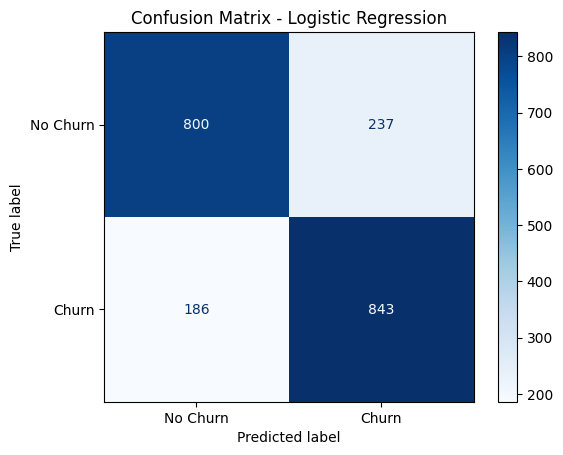

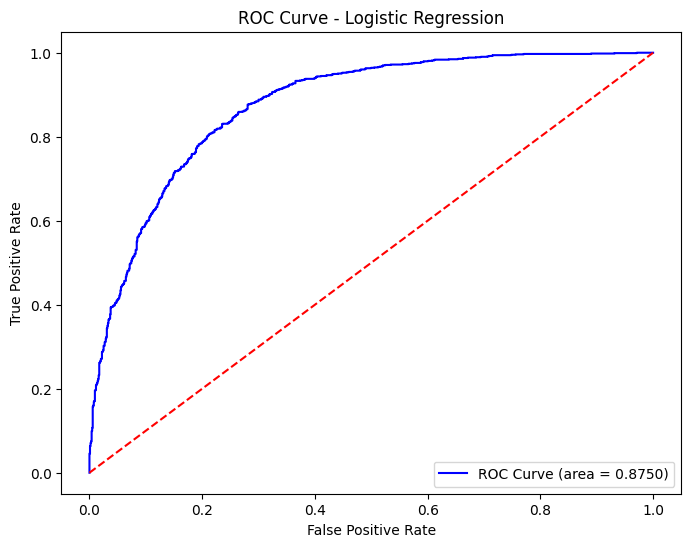

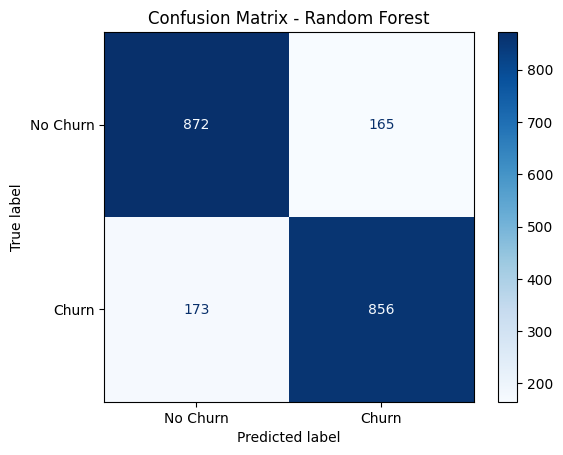

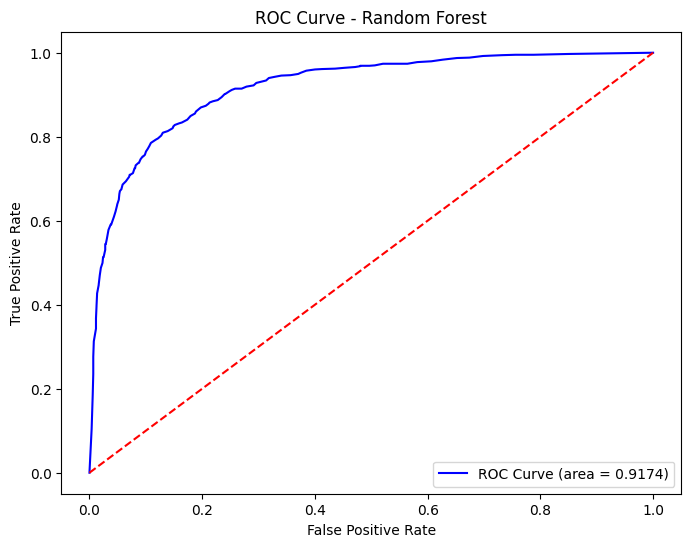

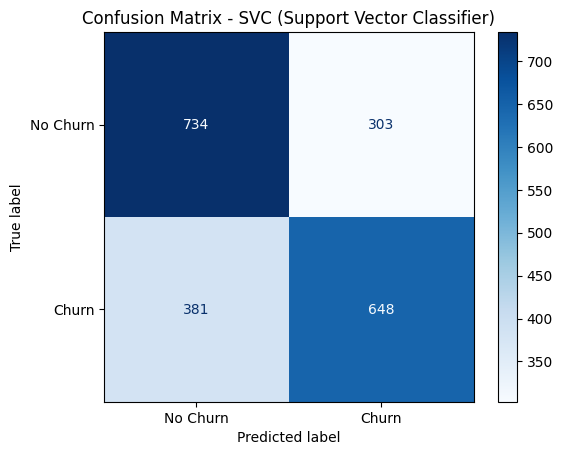

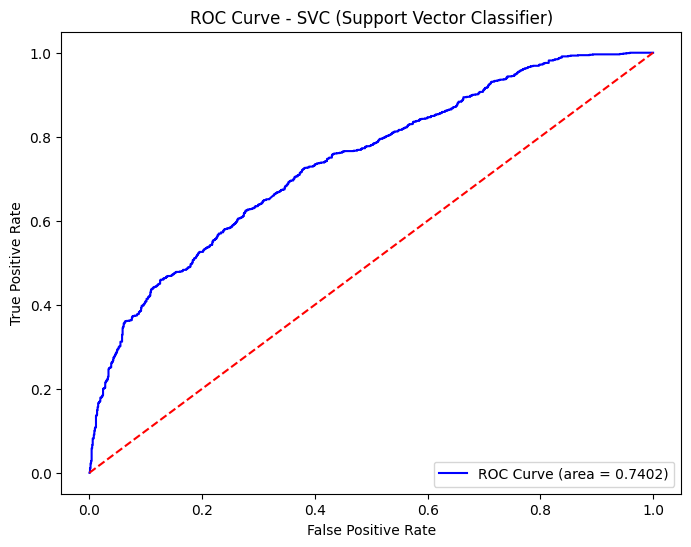

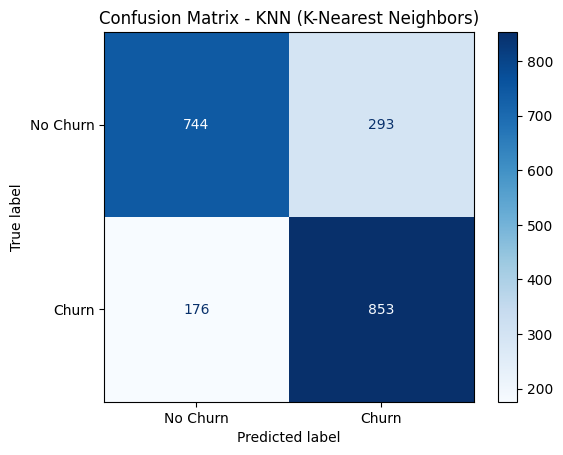

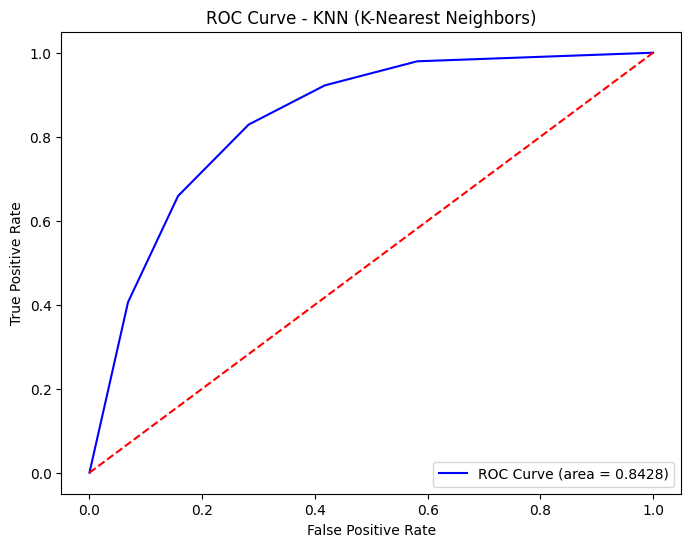

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC (Support Vector Classifier)': SVC(probability=True, random_state=42),
    'KNN (K-Nearest Neighbors)': KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Compute ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()


## Deep Learning Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocess the data (drop customerID and target variable, and handle missing values if any)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Encode categorical variables if needed
X = pd.get_dummies(X)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
y = y.map({'Yes': 1, 'No': 0})  # Convert 'Yes' to 1 and 'No' to 0

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Activation

# Initialize the model
model = Sequential()

# Add an input layer (64 neurons) and the first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7053 - loss: 0.5759 - val_accuracy: 0.7906 - val_loss: 0.4600
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8946 - loss: 0.2656 - val_accuracy: 0.7395 - val_loss: 0.5535
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9691 - loss: 0.0854 - val_accuracy: 0.6977 - val_loss: 0.7563
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9783 - loss: 0.0564 - val_accuracy: 0.6430 - val_loss: 1.0762
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9841 - loss: 0.0431 - val_accuracy: 0.6430 - val_loss: 1.1035
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9857 - loss: 0.0308 - val_accuracy: 0.6863 - val_loss: 1.0173
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9828 - loss: 0.0364 - val_accuracy: 0.6508 - val_loss: 1.3125
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9862 - loss: 0.0273 - val_accura

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 1.1335
Test Accuracy: 61.60%


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


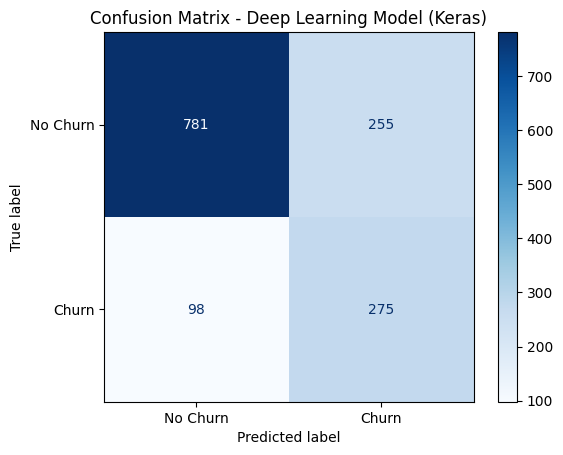

In [ ]:
# Predict on the test data
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to 0 or 1

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deep Learning Model (Keras)")
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


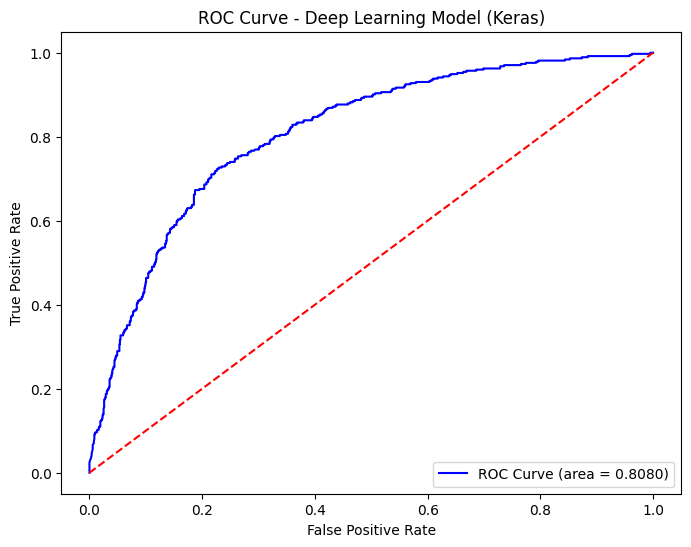

In [ ]:
# Predict probabilities on the test set
y_test_prob = model.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.title("ROC Curve - Deep Learning Model (Keras)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
